# Importing the necessary Libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Web scraping the data from the Wikipedia page

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [203]:
# Finding the table of presidents
table = soup.find('table', {'class': 'wikitable'})

In [4]:
# Extracting the data into a DataFrame
data = []
columns = []

In [5]:
# Get table headers
headers = table.find_all('th')
columns = [header.text.strip() for header in headers]

In [7]:
# Adjusting for headers 
if len(columns) > 7:
    columns = columns[:7] 
# Removing the first two rows     
columns = columns[2:]
#Cleaning the header columns 
for i, element in enumerate(columns):
    columns[i] = element.split('[')[0]
columns

['Name(Birth–Death)', 'Term', 'Party', 'Election', 'Vice President']

In [8]:
# Getting the table rows
rows = table.find_all('tr')
for row in rows:
    cells = row.find_all('td')
    cells = [cell.text.strip() for cell in cells]
    if len(cells) == 7:
        data.append(cells)
    else:
        # Handle rows with missing columns
        while len(cells) < 7:
            cells.append(None)  
            #Truncating to get rid of other columns that are not required
        data.append(cells[:7])  

In [11]:
for row in data:
    for element in row:
        if(element == ''):
            row.remove(element)
#Removing the first empty row 
data = data[1:]

In [14]:
#Cleaning the data and removing all []
for row in data:
    for i, element in enumerate(row):
        if element is not None:
            row[i] = element.split('[')[0]
data

[['George Washington(1732–1799)',
  'April 30, 1789–March 4, 1797',
  'Unaffiliated',
  '1788–1789\n\n1792',
  'John Adams'],
 ['John Adams(1735–1826)',
  'March 4, 1797–March 4, 1801',
  'Federalist',
  '1796',
  'Thomas Jefferson'],
 ['Thomas Jefferson(1743–1826)',
  'March 4, 1801–March 4, 1809',
  'Democratic-Republican',
  '1800\n\n1804',
  'Aaron Burr\n\nGeorge Clinton'],
 ['James Madison(1751–1836)',
  'March 4, 1809–March 4, 1817',
  'Democratic-Republican',
  '1808\n\n1812',
  'George Clinton'],
 ['James Monroe(1758–1831)',
  'March 4, 1817–March 4, 1825',
  'Democratic-Republican',
  '1816\n\n1820',
  'Daniel D. Tompkins'],
 ['John Quincy Adams(1767–1848)',
  'March 4, 1825–March 4, 1829',
  'Democratic-Republican',
  '1824',
  'John C. Calhoun'],
 ['Andrew Jackson(1767–1845)',
  'March 4, 1829–March 4, 1837',
  'Democratic',
  '1828\n\n1832',
  'John C. Calhoun'],
 ['Martin Van Buren(1782–1862)',
  'March 4, 1837–March 4, 1841',
  'Democratic',
  '1836',
  'Richard Mentor Jo

In [16]:
# Creating DataFrame
df = pd.DataFrame(data, columns=columns)
df.head()


,Name(Birth–Death),Term,Party,Election,Vice President
0,George Washington(1732–1799),"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789\n\n1792,John Adams
1,John Adams(1735–1826),"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson
2,Thomas Jefferson(1743–1826),"March 4, 1801–March 4, 1809",Democratic-Republican,1800\n\n1804,Aaron Burr\n\nGeorge Clinton
3,James Madison(1751–1836),"March 4, 1809–March 4, 1817",Democratic-Republican,1808\n\n1812,George Clinton
4,James Monroe(1758–1831),"March 4, 1817–March 4, 1825",Democratic-Republican,1816\n\n1820,Daniel D. Tompkins


In [157]:
# Cleaning and formatting the data
df.columns = df.columns.str.replace('\n', ' ').str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

,Name,Birth-Death,Term,Party,Election,Vice President,Birth,Death
0,George Washington,1732–1799,"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789\n\n1792,John Adams,1732,1799
1,John Adams,1735–1826,"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson,1735,1826
2,Thomas Jefferson,1743–1826,"March 4, 1801–March 4, 1809",Democratic-Republican,1800\n\n1804,Aaron Burr\n\nGeorge Clinton,1743,1826
3,James Madison,1751–1836,"March 4, 1809–March 4, 1817",Democratic-Republican,1808\n\n1812,George Clinton,1751,1836
4,James Monroe,1758–1831,"March 4, 1817–March 4, 1825",Democratic-Republican,1816\n\n1820,Daniel D. Tompkins,1758,1831


In [18]:
name_col = 'Name(Birth–Death)'
# Separating name from birth-death years 
def separate_name_year(name_year):
    if pd.isna(name_year):  
        return None, None
    parts = name_year.split('(')
    name = parts[0].strip()
    year = parts[1].split(')')[0].strip() if len(parts) > 1 else None
    return name, year

# Apply the function and create new columns
new_columns = df[name_col].apply(lambda x: pd.Series(separate_name_year(x), index=['Name', 'Birth-Death']))

# Concatenate new columns with the original DataFrame
df = pd.concat([new_columns, df], axis=1)

# Drop the old combined column
df.drop(columns=[name_col], inplace=True)

In [19]:
df 

,Name,Birth-Death,Term,Party,Election,Vice President
0,George Washington,1732–1799,"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789\n\n1792,John Adams
1,John Adams,1735–1826,"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson
2,Thomas Jefferson,1743–1826,"March 4, 1801–March 4, 1809",Democratic-Republican,1800\n\n1804,Aaron Burr\n\nGeorge Clinton
3,James Madison,1751–1836,"March 4, 1809–March 4, 1817",Democratic-Republican,1808\n\n1812,George Clinton
4,James Monroe,1758–1831,"March 4, 1817–March 4, 1825",Democratic-Republican,1816\n\n1820,Daniel D. Tompkins
5,John Quincy Adams,1767–1848,"March 4, 1825–March 4, 1829",Democratic-Republican,1824,John C. Calhoun
6,Andrew Jackson,1767–1845,"March 4, 1829–March 4, 1837",Democratic,1828\n\n1832,John C. Calhoun
7,Martin Van Buren,1782–1862,"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson
8,William Henry Harrison,1773–1841,"March 4, 1841–April 4, 1841",Whig,1840,John Tyler
9,John Tyler,1790–1862,"April 4, 1841",Whig,–,Vacant throughoutpresidency


# 2. How many presidents are on the web page?

In [160]:
presidents_count = len(df['Name'].unique())
print(f"There have existed {presidents_count} presidents in the USA.")

There have existed 45 presidents in the USA.


# 3. How many presidencies are on the web page?

In [158]:
presidencies_count = len(df)
print(f"There are {presidencies_count} presidencies on the wikipedia webpage.")

There are 46 presidencies


# 4. Which presidents served more than one term and had only one vice president for the whole duration of their presidency?

In [155]:
# Extract the 'Elections' data
election_data = df['Election'].tolist()

# Convert election data into a list of lists
election_years = []
for election in election_data:
    years = []
    for year in election.split('\n'):
        if year.strip():
            years.append(year.strip())
    election_years.append(years)
# Get the length of each sublist

years_served = []
for years in election_years:
    years_served.append(len(years))


vice_president_data = df['Vice President'].tolist()

vice_presi = []
for vicep in vice_president_data:
    vps = []
    for vp in vicep.split('\n'):
        if vp.strip():
            vps.append(vp.strip())
    vice_presi.append(vps)
    
presi_multi_term_one_vice = []
for i, element in enumerate(vice_presi):
    if years_served[i] > 1 and len(vice_presi[i]) == 1:
        presi_multi_term_one_vice.append(df['Name'][i])

print(f"Presidents who served more than one term and had only one vice president for the whole duration of their presidency \n {presi_multi_term_one_vice}")

Presidents who served more than one term and had only one vice president for the whole duration of their presidency 
 ['George Washington', 'James Madison', 'James Monroe', 'Andrew Jackson', 'William McKinley', 'Woodrow Wilson', 'Dwight D. Eisenhower', 'Richard Nixon', 'Ronald Reagan', 'Bill Clinton', 'George W. Bush', 'Barack Obama']


# 5. Which president was in office longer than others and when did he get in office? [5]

In [174]:
presi_terms_data = df['Term'].tolist()

presi_terms = []

# Iterate through each term in 'presi_terms_data'
for term in presi_terms_data:
    # Initialize a temporary list to hold split and cleaned terms
    split_terms = []
    for t in term.split('–'):
        cleaned_term = t.strip()
        if cleaned_term:
            split_terms.append(cleaned_term)
    presi_terms.append(split_terms)
    
# Display the number of years each president served
max_term = 0 
for i in range(len(df['Name'])):
    president = df['Name'][i]
    presidents_terms_served = years_served[i]
# Finding the maximum term 
for i in range(len(years_served)):
    if(years_served[i] > max_term):
        max_term = years_served[i]
        president = df['Name'][i] 
        presi_start_date = presi_terms[i][0]
print(f"President {president} was in office {max_term} times. He got in office in {presi_start_date}.")

President Franklin D. Roosevelt was in office 4 times. He got in office in March 4, 1933.


# 6. Which presidents were elected after serving as vice presidents? 

In [184]:
all_vice_presi_in_one = []
vice_presi_terms = []

# Flatten the list of lists into a single list
for i, sublist in enumerate(vice_presi):
    vice_presi_terms.append(df['Term'][i])  # Store the corresponding term for each sublist
    for item in sublist:
        all_vice_presi_in_one.append(item)

# Initialize an empty list to store the presidents who were vice presidents
vice_to_presi = []

# Iterating through the all_vice_presi_in_one list (vice presidents) and comparing it to the presidents column
for vp in all_vice_presi_in_one:
    for i in range(len(df['Name'])):
        if vp == df['Name'][i]:
            presi = df['Name'][i]  
            vice_to_presi.append(presi)

print("Presidents who were elected after serving as vice presidents:\n", vice_to_presi)

# Iterate over the vice presidents and print their vice presidency and presidency terms
for i, president in enumerate(vice_to_presi):
    index = all_vice_presi_in_one.index(president)  # Get the index of the president in the flattened list
    print(f"\n{president}:")
    print(f"  - Vice Presidency: {vice_presi_terms[i]}")
    print(f"  - Presidency: {vice_presi_terms[i]}")


Presidents who were elected after serving as vice presidents:
 ['John Adams', 'Thomas Jefferson', 'John Tyler', 'Millard Fillmore', 'Andrew Johnson', 'Chester A. Arthur', 'Calvin Coolidge', 'Harry S. Truman', 'Richard Nixon', 'Lyndon B. Johnson', 'George H. W. Bush', 'Joe Biden']

John Adams:
  - Vice Presidency: April 30, 1789–March 4, 1797
  - Presidency: April 30, 1789–March 4, 1797

Thomas Jefferson:
  - Vice Presidency: March 4, 1797–March 4, 1801
  - Presidency: March 4, 1797–March 4, 1801

John Tyler:
  - Vice Presidency: March 4, 1801–March 4, 1809
  - Presidency: March 4, 1801–March 4, 1809

Millard Fillmore:
  - Vice Presidency: March 4, 1809–March 4, 1817
  - Presidency: March 4, 1809–March 4, 1817

Andrew Johnson:
  - Vice Presidency: March 4, 1817–March 4, 1825
  - Presidency: March 4, 1817–March 4, 1825

Chester A. Arthur:
  - Vice Presidency: March 4, 1825–March 4, 1829
  - Presidency: March 4, 1825–March 4, 1829

Calvin Coolidge:
  - Vice Presidency: March 4, 1829–March

# 7. How many presidents were never elected, and what are their names? 

In [175]:
# Filtering the DataFrame to find presidents who were never elected
never_elected_presidents = df[df['Election'] == '–']['Name']

# Displaying the names of these presidents
print("Presidents who were never elected but served as senators:")
for i, name in enumerate(never_elected_presidents):
    print(f"{name} from {df['Term'][i]}")


Presidents who were never elected:
John Tyler - April 30, 1789–March 4, 1797
Millard Fillmore - March 4, 1797–March 4, 1801
Andrew Johnson - March 4, 1801–March 4, 1809
Chester A. Arthur - March 4, 1809–March 4, 1817
Gerald Ford - March 4, 1817–March 4, 1825


# 8. How many presidents have the same forenames and/or surnames and who are they?

In [240]:
split_names = df['Name'].str.split(' ', expand=True)

presi_forenames = split_names[0].tolist()
presi_surnames = []  

#spliting the arrays to create new arrays
for i in split_names:
    if split_names[2].isna().all():
        presi_surnames.append(split_names[1])
    elif split_names[3].isna().all():
        presi_surnames.append(split_names[2])
    else:
        presi_surnames.append(split_names[3])

# Finding the common forenames
common_forenames = df['Name'].str.split(' ', expand=True)[0].value_counts()
common_forenames = common_forenames[common_forenames > 1].index

# Printing presidents with common forenames
for forename in common_forenames:
    common_forename_presidents = df[df['Name'].str.startswith(forename)]
    print(f"Presidents with the forename {forename}:")
    for name in common_forename_presidents['Name']:
        print(name)
    print()  
# Finding the common surnames
common_surnames = df['Name'].str.split(' ',expand =True)[1].value_counts()
common_surnames = common_surnames[common_surnames>1].index
# Printing presidents with common surnames
for surname in common_surnames:
    common_surnames_presidents = df[df['Name'].str.endswith(surname)]
    print(f"Presidents with the surname {surname}: ")
    for name in common_surnames_presidents['Name']:
        print(name)
    print()


Presidents with the forename James:
James Madison
James Monroe
James K. Polk
James Buchanan
James A. Garfield

Presidents with the forename John:
John Adams
John Quincy Adams
John Tyler
John F. Kennedy

Presidents with the forename George:
George Washington
George H. W. Bush
George W. Bush

Presidents with the forename William:
William Henry Harrison
William McKinley
William Howard Taft

Presidents with the forename Grover:
Grover Cleveland
Grover Cleveland

Presidents with the forename Franklin:
Franklin Pierce
Franklin D. Roosevelt

Presidents with the forename Andrew:
Andrew Jackson
Andrew Johnson

Presidents with the surname Cleveland: 
Grover Cleveland
Grover Cleveland

Presidents with the surname A.: 

Presidents with the surname B.: 

Presidents with the surname S.: 

Presidents with the surname D.: 



# Who was the oldest president ever elected for office ?


In [202]:
#Getting the birth-death data and spliting it 
birth_death_split = df['Birth-Death'].str.split('–')
#Creating new array for birth and deaths 
presi_births = []
presi_deaths = []
#Populating the arrays with data from the birth_death_split 
for list in birth_death_split:
    if len(list) >= 2:
        if list[0].isdigit():
            presi_births.append(int(list[0]))
        if list[1].isdigit():
            presi_deaths.append(int(list[1]))

            
#Finding the oldest president
largest_presi_age = 0
for i in range(len(presi_deaths)):
    presi_age = presi_deaths[i] - presi_births[i] 
    if presi_age > largest_presi_age:
        largest_presi_age = presi_age
        oldest_president = df['Name'][i]
        mandate = df['Term'][i].split('-')
print(f"The oldest presient was {oldest_president} with an age of {largest_presi_age} years who was president from {mandate}")

The oldest presient was Ronald Reagan with an age of 94 years who was president from ['January 20, 1981–January 20, 1989']


# 10. Who was the youngest president ever elected for office ?

In [151]:
#Finding the youngest president 

youngest_presi_age = largest_presi_age

for i in range(len(presi_deaths)):
    presi_age = presi_deaths[i] - presi_births[i] 
    if presi_age < youngest_presi_age:
        youngest_presi_age = presi_age
        youngest_president = df['Name'][i]
        
print(f"The youngest presient was {youngest_president} with an age of {youngest_presi_age} years.")

The oldest presient was John F. Kennedy with an age of 46 years.


# 11. Which president lived up to a very old age, after leaving office ?

In [168]:
endedmandate_year = []
for term in presi_terms:
    if len(term) > 1 and term[1][-4:].isdigit():
        last_year = int(term[1][-4:])
        endedmandate_year.append(last_year)

old_age = 0
for i in range(len(endedmandate_year)):
    age = presi_deaths[i] - endedmandate_year[i] 
    if age > old_age:
        ind = i
        old_age = age
        long_life_president  = df['Name'][i]
        
print(f"President {long_life_president} lived for {old_age} after leaving the presidency on {presi_terms[1][ind]}.")

President John Adams lived for 25 after leaving the presidency on March 4, 1801


# 12.A graph that shows the number of presidents and their respective political parties which they came from, and which party have many elected presidents ?[5]

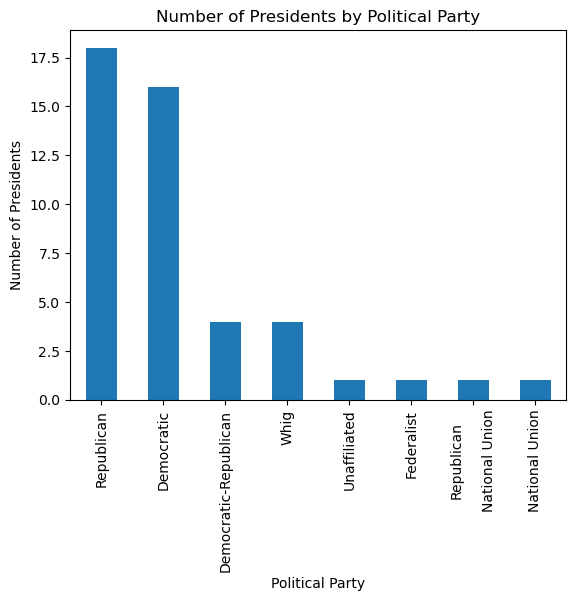

In [169]:

import matplotlib.pyplot as plt

party_counts = df['Party'].value_counts()
party_counts.plot(kind='bar')
plt.xlabel('Political Parties')
plt.ylabel('Number of Presidents')
plt.title('Number of Presidents per Political Party')
plt.show()
